In [2]:
import sys

import so_ml_tools as soml
import tensorflow as tf
import keras_tuner as kt

from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.utils import to_categorical, to_ordinal

2023-11-19 16:26:40.777046: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-19 16:26:40.777066: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-19 16:26:40.777091: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Define class labels

In [3]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

## Download the MNIST data set

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train size: {len(X_train)}, shape {X_train.shape}")
print(f"y_train size: {len(y_train)}, shape {y_train.shape}")
print(f"X_test size: {len(X_test)}, shape {X_test.shape}")
print(f"y_test size: {len(y_test)}, shape {y_test.shape}")

X_train size: 60000, shape (60000, 28, 28)
y_train size: 60000, shape (60000,)
X_test size: 10000, shape (10000, 28, 28)
y_test size: 10000, shape (10000,)


## Pre-process data

In [30]:
_np.unique(_np.argmax(y_test, axis=1), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [5]:
X_train = X_train / 255.
X_test = X_test / 255.

## Reshape the data

In [6]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

## Visualize the data

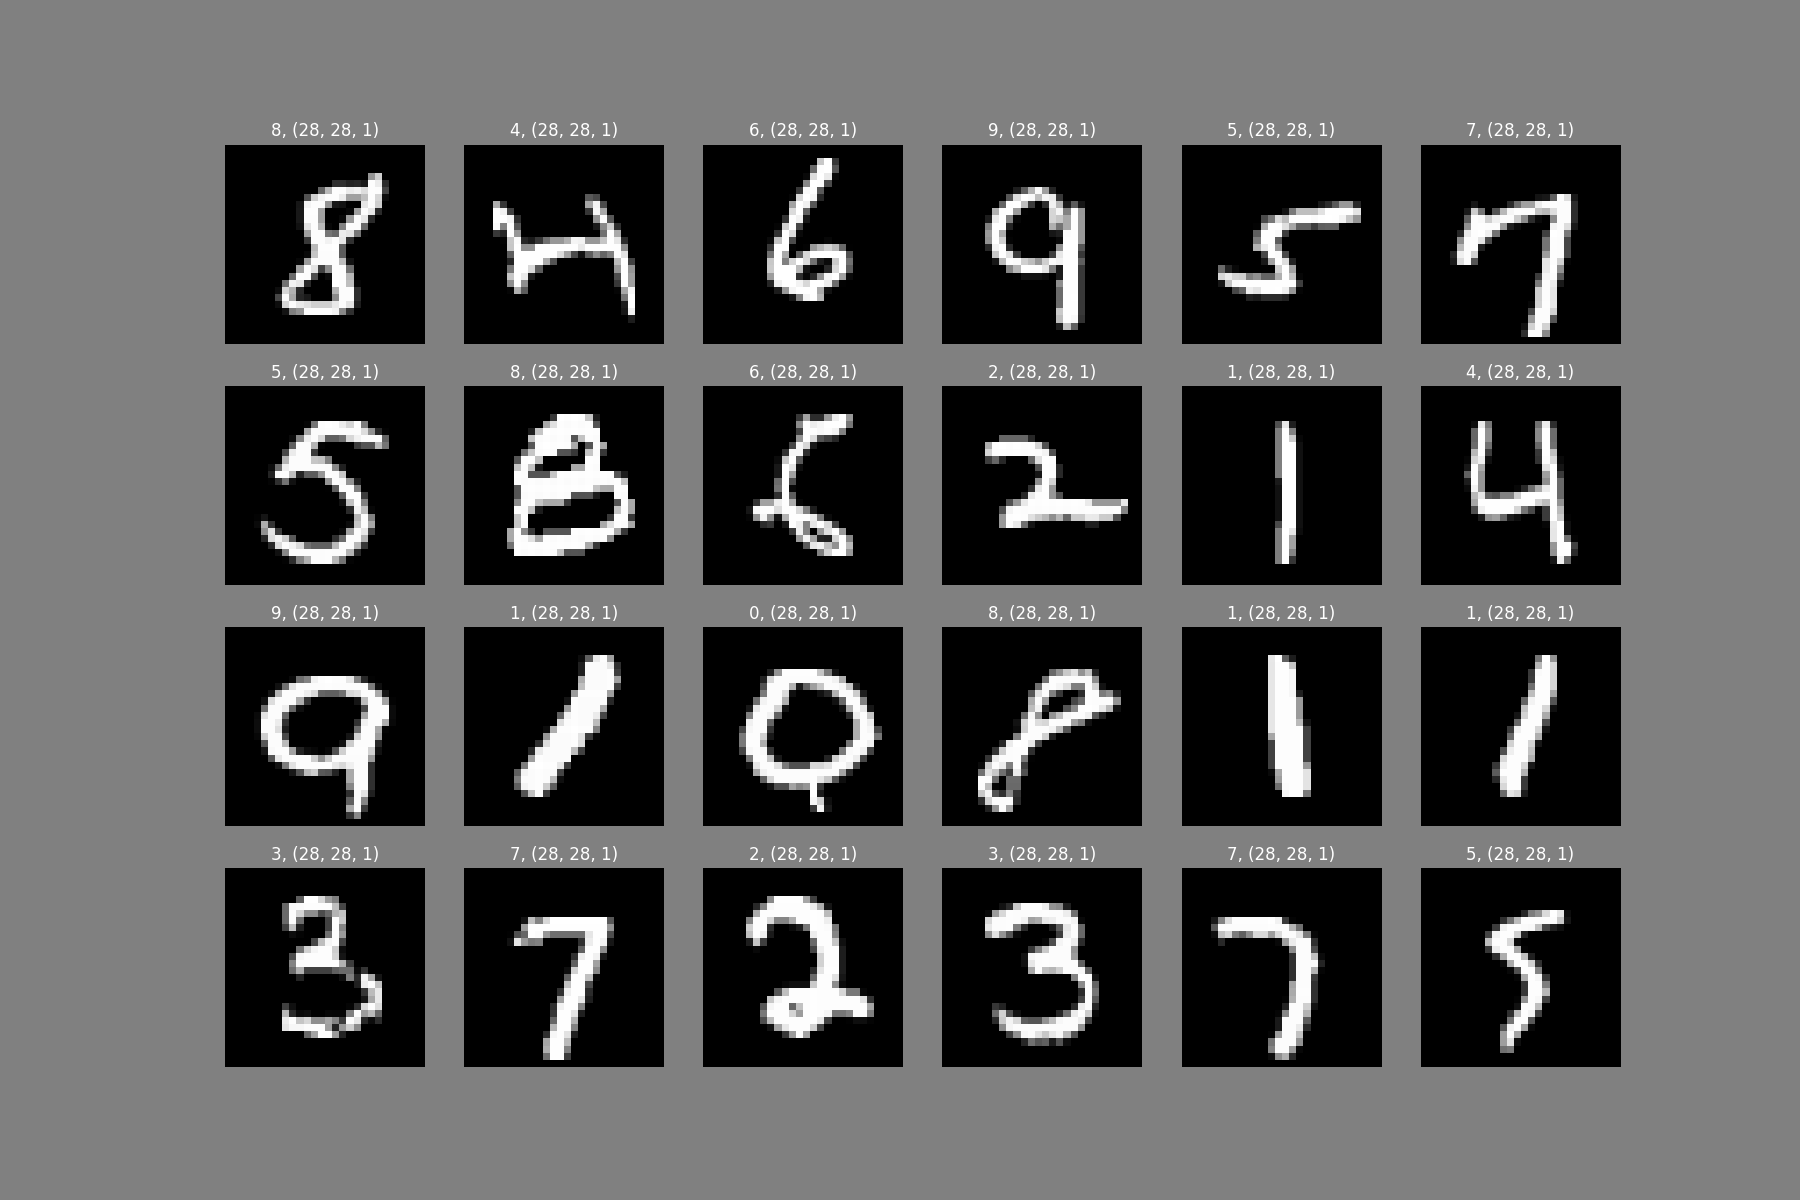

In [32]:
soml.data.image.show_images_from_nparray_or_tensor(x=X_train, y=y_train, class_names=class_names, shape=(4, 6))

## One-hot encode the labels

In [8]:
y_train.shape

(60000,)

In [9]:
y_train = to_categorical(y_train, dtype=int)
y_test = to_categorical(y_test, dtype=int)

## Inspect if the labels still match with the images

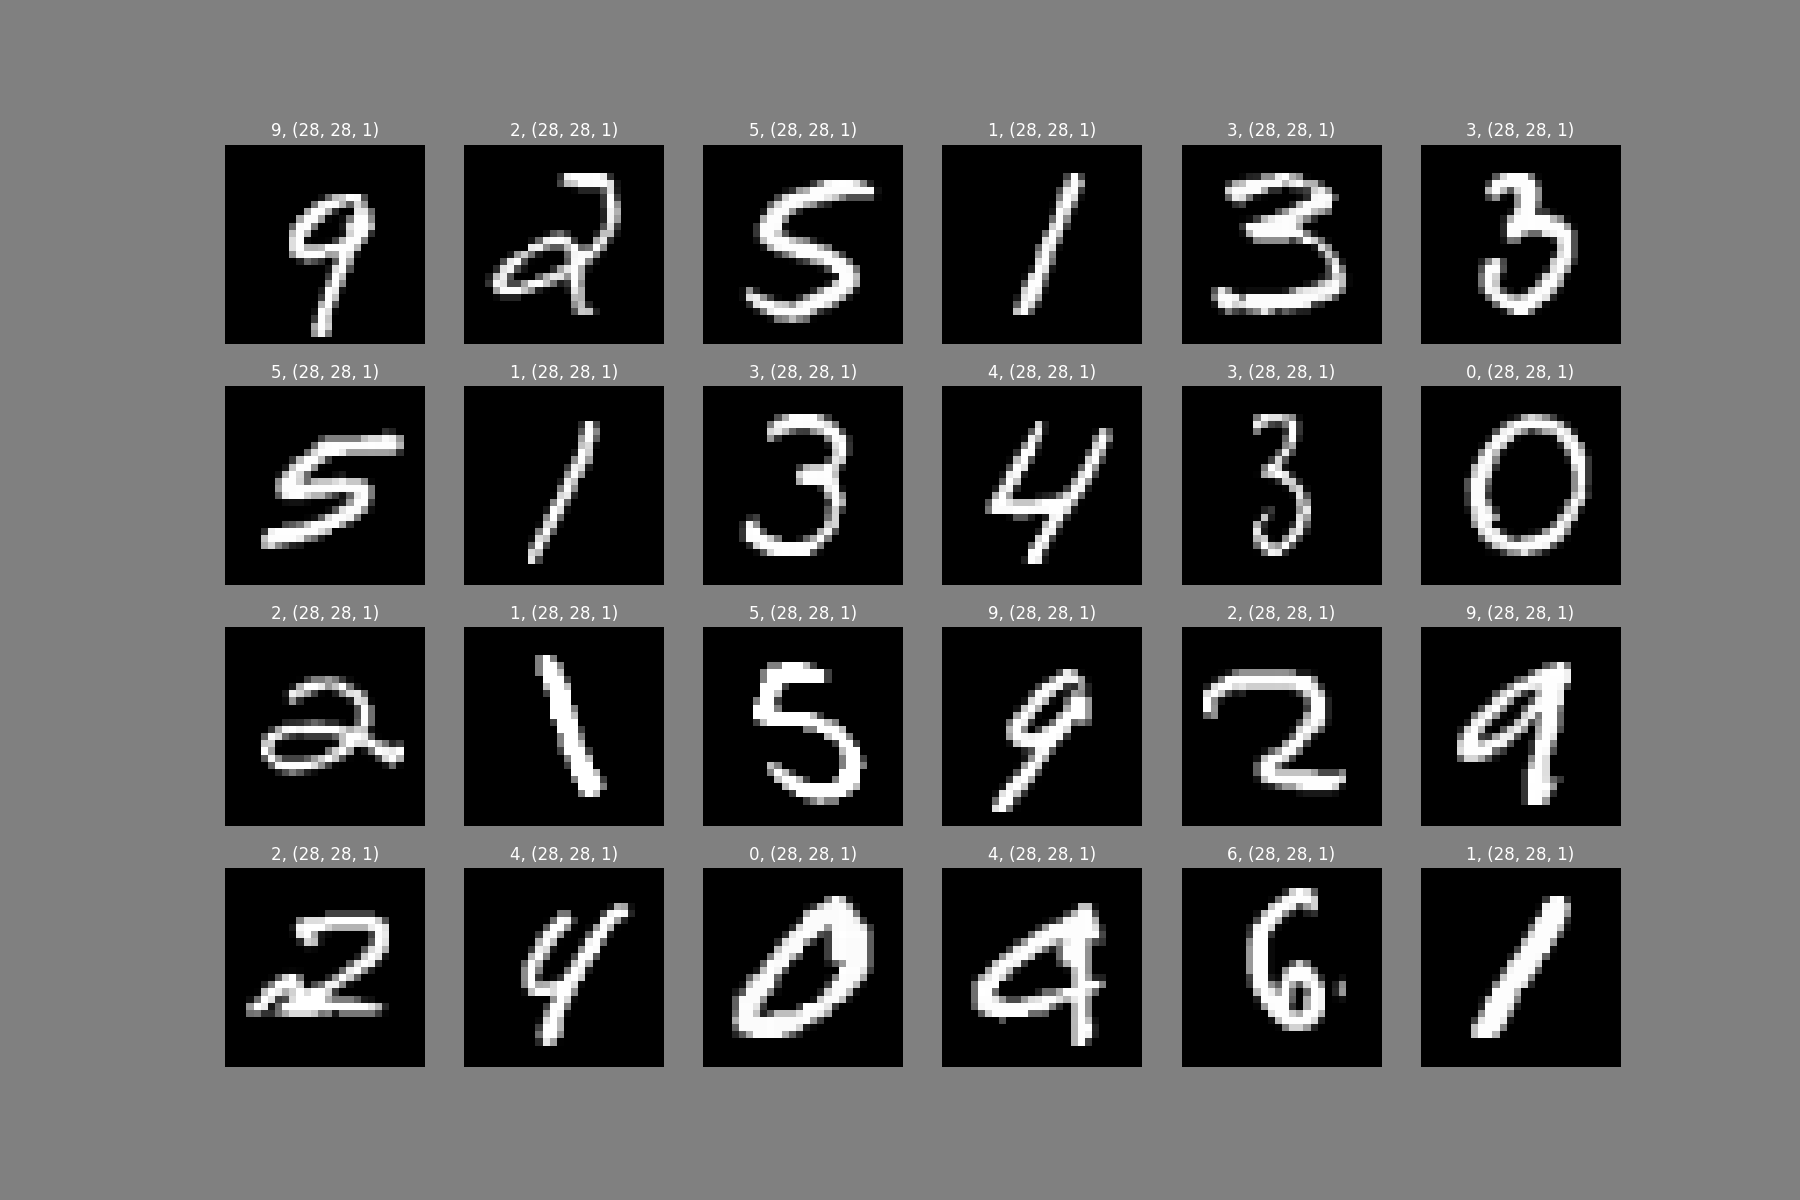

In [33]:
soml.data.image.show_images_from_nparray_or_tensor(x=X_train, y=y_train, class_names=class_names, shape=(4, 6))

In [11]:
train_gen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1, 
)
train_gen.fit(X_train)

train_data = train_gen.flow(X_train, y_train, batch_size=32, shuffle=True, seed=42)

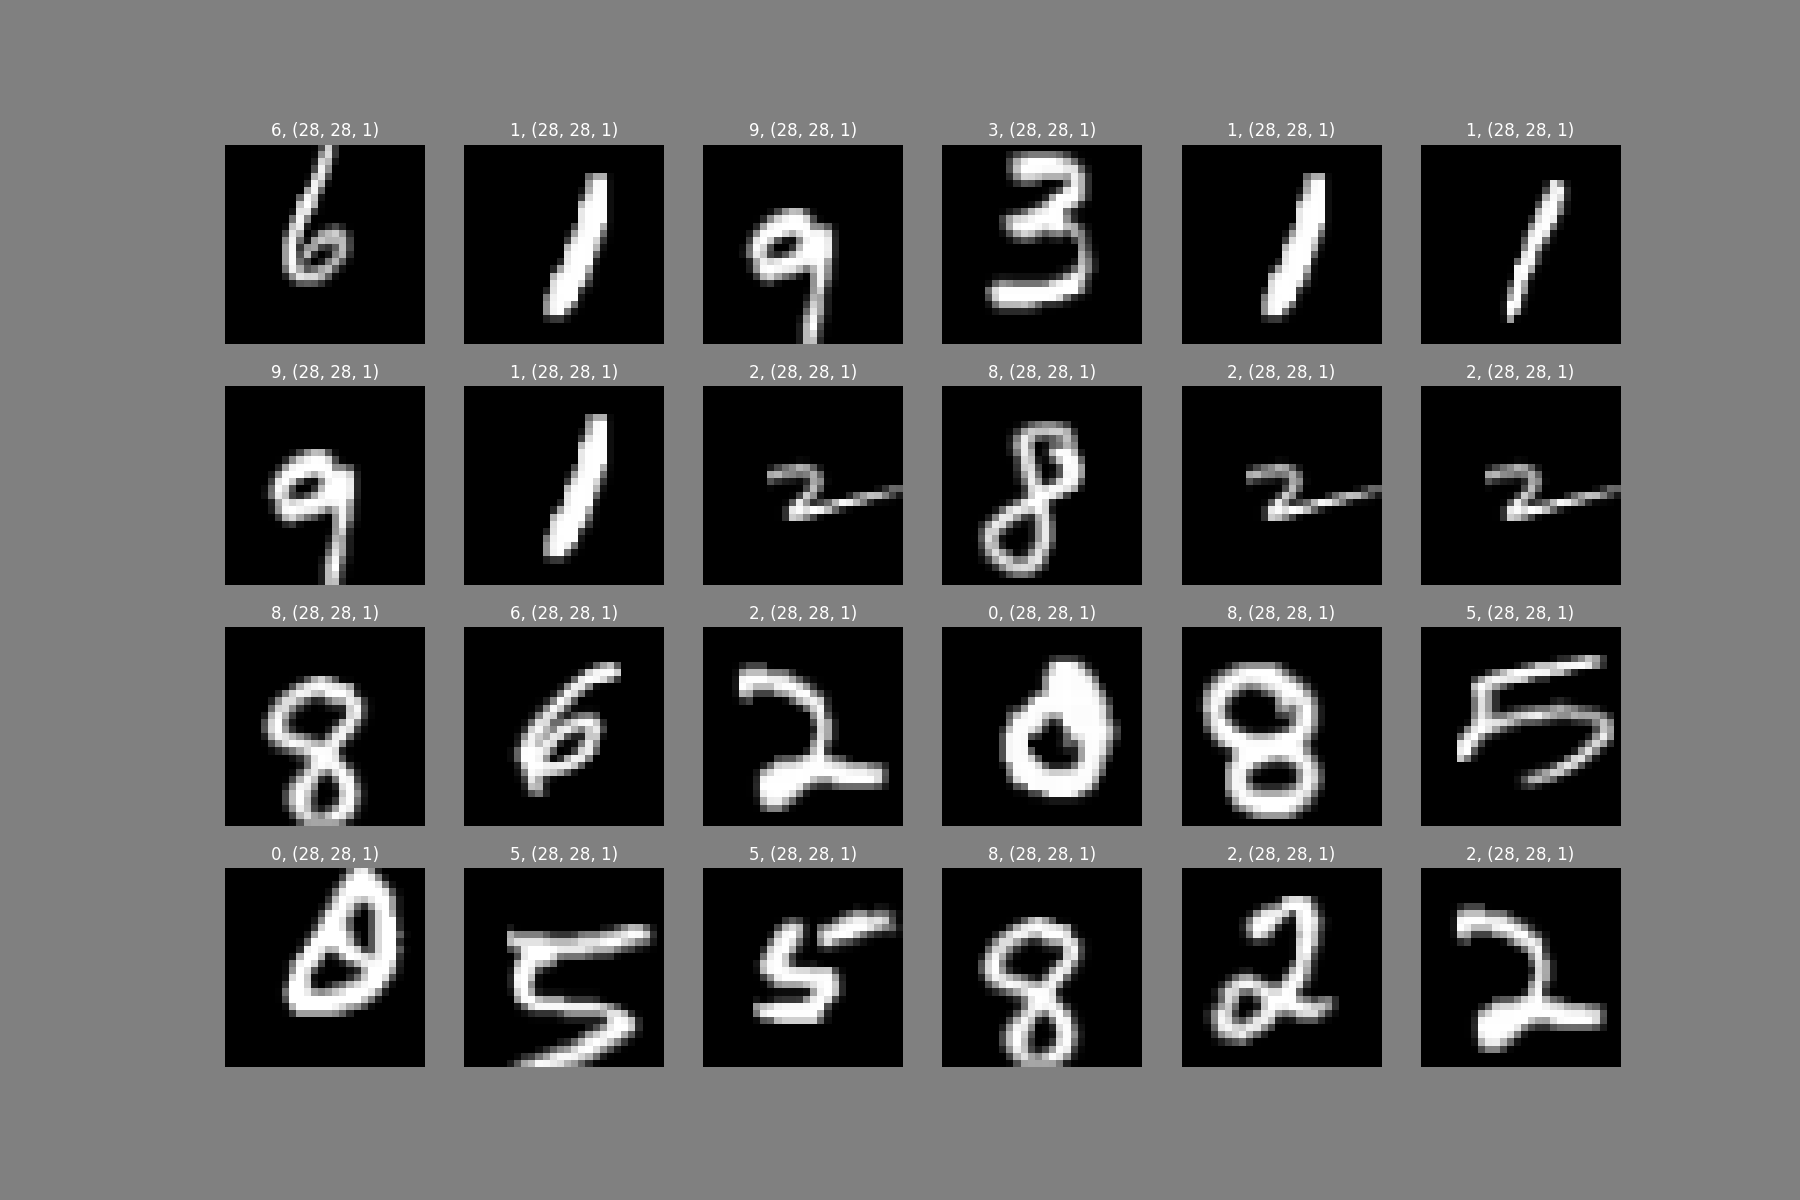

In [34]:
images, labels = train_data.next()
soml.data.image.show_images_from_nparray_or_tensor(x=images, y=labels, class_names=class_names)

In [76]:
tf.random.set_seed(42)

model_1 = Sequential([
    Conv2D(filters=16, kernel_size=(2, 2), padding="same", activation="relu", input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=2),
    Dropout(rate=0.2),
    Conv2D(filters=16, kernel_size=2, strides=2, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),
    Dropout(0.2),
    Conv2D(filters=16, kernel_size=2, strides=2, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model_1.compile(loss=categorical_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 16)          1040      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 16)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 3, 3, 16)          0

In [77]:
history_1 = model_1.fit(
    train_data,
    epochs=25,
    batch_size=32,
    steps_per_epoch=len(train_data),
    validation_data=(X_test, y_test),
    validation_steps=len(X_test)
)

Epoch 1/25
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5855 - accuracy: 0.4303 - val_loss: 0.6546 - val_accuracy: 0.7893
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1094 - accuracy: 0.6133
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9850 - accuracy: 0.6604
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9245 - accuracy: 0.6848
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8786 - accuracy: 0.7017
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8571 - accuracy: 0.7107
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8303 - accuracy: 0.7177
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8258 - accuracy: 0.7217
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8055 - accuracy: 0.7278
Epoch 10/25
1875/1875 [=================

## Try to find the optimal model using Keras Tuner

In [78]:
# Create a model builder method which will be used by the Keras Tuner to create new models with new parameters.

def model_builder(hp):
    hp_conv_1_filters = hp.Choice('conv_1_filters', values=[24, 32, 48])
    hp_conv_2_filters = hp.Choice('conv_2_filters', values=[24, 32, 48])
    hp_conv_3_filters = hp.Choice('conv_3_filters', values=[24, 32, 48])

    hp_dropout_1_rate = hp.Choice('dropout_1_rate', values=[0.2])
    hp_dropout_2_rate = hp.Choice('dropout_2_rate', values=[0.2])
    hp_dropout_3_rate = hp.Choice('dropout_3_rate', values=[0.2])

    hp_dense_1_units = hp.Choice('dense_1_units', values=[64])

    model = Sequential([
        Conv2D(name="conv_1", filters=hp_conv_1_filters, kernel_size=(2, 2), padding="same", activation="relu",
               input_shape=(28, 28, 1)),
        MaxPool2D(pool_size=2),
        Dropout(name="dropout_1", rate=hp_dropout_1_rate),
        Conv2D(name="conv_2", filters=hp_conv_2_filters, kernel_size=2, strides=2, padding="same", activation="relu"),
        MaxPool2D(pool_size=2),
        Dropout(name="dropout_2", rate=hp_dropout_2_rate),
        Conv2D(name="conv_3", filters=hp_conv_3_filters, kernel_size=2, strides=2, padding="same", activation="relu"),
        MaxPool2D(pool_size=2),
        Dropout(name="dropout_3", rate=hp_dropout_3_rate),
        Flatten(),
        Dense(name="dense_1", units=hp_dense_1_units, activation="relu"),
        Dense(10, activation="softmax")
    ])

    hp_learning_rate = hp.Choice('learning_rate', values=[0.001])

    model.compile(loss=categorical_crossentropy,
                  optimizer=Adam(learning_rate=hp_learning_rate),
                  metrics=["accuracy"])

    return model

In [84]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner = kt.Hyperband(model_builder,
                     objective='accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='tuner',
                     project_name='keras-mnist')

tuner.search(
    train_data,
    epochs=25,
    steps_per_epoch=len(train_data),
    validation_data=(X_test, y_test),
    validation_steps=len(X_test),
    callbacks=[stop_early]
)

Trial 30 Complete [00h 02m 11s]
accuracy: 0.8788666725158691

Best accuracy So Far: 0.907716691493988
Total elapsed time: 00h 27m 02s
INFO:tensorflow:Oracle triggered exit


## Get the best model from the results and print out a summary.

In [ ]:
best_models = tuner.get_best_models(num_models=2)
best_models[0].summary()

## Get the best hyper parameters and print them out.

In [86]:
best_parameters = tuner.get_best_hyperparameters(1)[0]
best_parameters.values

{'conv_1_filters': 48,
 'conv_2_filters': 48,
 'conv_3_filters': 48,
 'dropout_1_rate': 0.2,
 'dropout_2_rate': 0.2,
 'dropout_3_rate': 0.2,
 'dense_1_units': 64,
 'learning_rate': 0.001,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0018'}

## Build a new model using these hyperparameters

In [13]:
tf.random.set_seed(42)

model_2 = Sequential([
    Conv2D(filters=48, kernel_size=(2, 2), padding="same", activation="relu", input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=2),
    Dropout(rate=0.2),
    Conv2D(filters=48, kernel_size=2, strides=2, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),
    Dropout(0.2),
    Conv2D(filters=48, kernel_size=2, strides=2, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model_2.compile(loss=categorical_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 48)        240       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 48)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 48)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 48)          9264      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 48)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 3, 3, 48)          0

In [14]:
history_2 = model_2.fit(
    train_data,
    epochs=50,
    batch_size=32,
    steps_per_epoch=len(train_data),
    validation_data=(X_test, y_test),
    validation_steps=len(X_test)
)

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0047 - accuracy: 0.6561 - val_loss: 0.2604 - val_accuracy: 0.9206
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5329 - accuracy: 0.8263
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4344 - accuracy: 0.8598
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3826 - accuracy: 0.8777
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3487 - accuracy: 0.8871
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3332 - accuracy: 0.8919
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3139 - accuracy: 0.8982
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3026 - accuracy: 0.9023
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2928 - accuracy: 0.9054
Epoch 10/50
1875/1875 [=================

## Evaluate model_2 to see the accuracy of the found model

In [15]:
results = model_2.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 0s 984us/step - loss: 0.0655 - accuracy: 0.9774
test loss, test acc: [0.06545660644769669, 0.977400004863739]


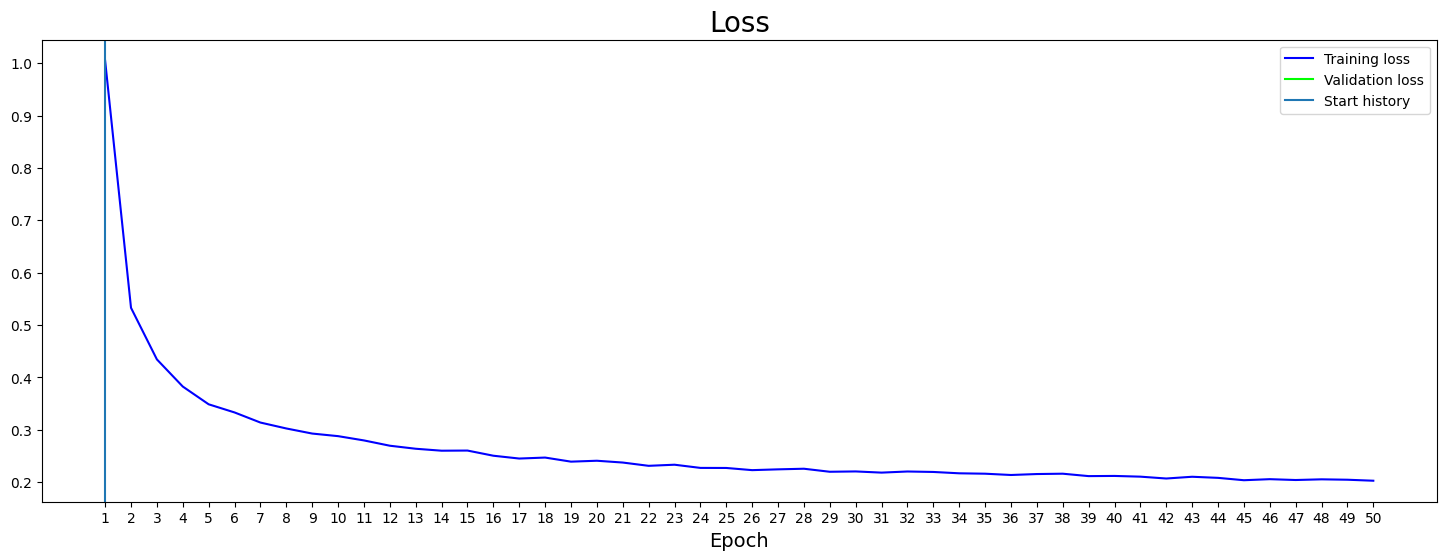

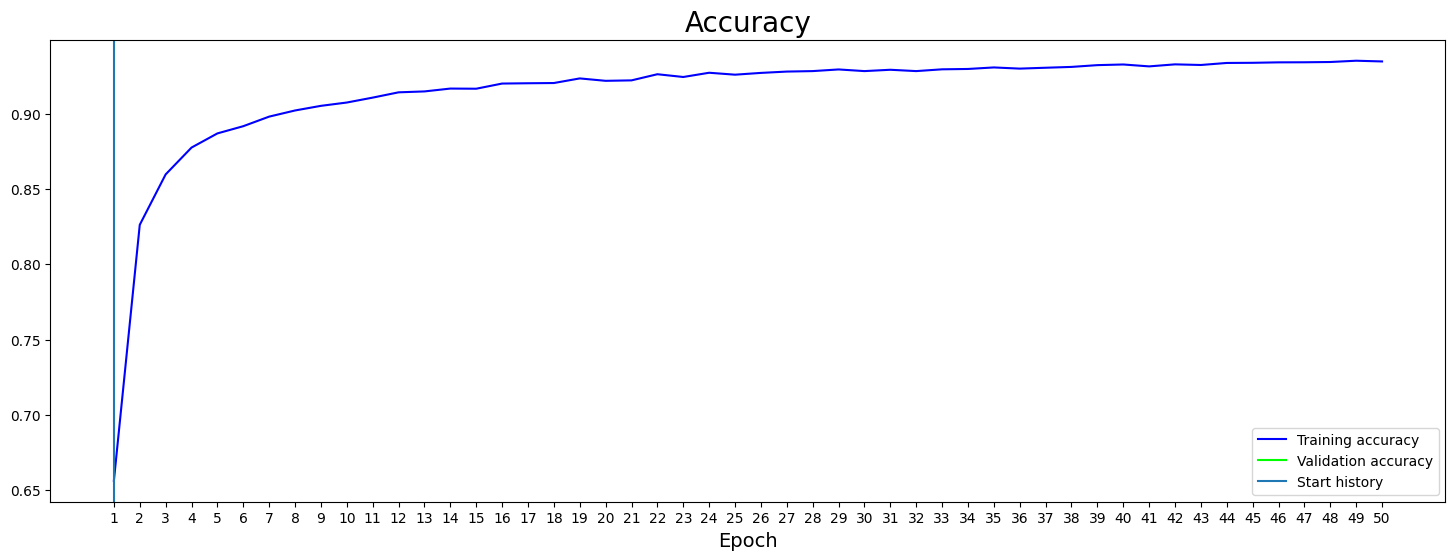

In [18]:
soml.tf.model.plot.plot_history(history=history_2, figsize=(18, 6))

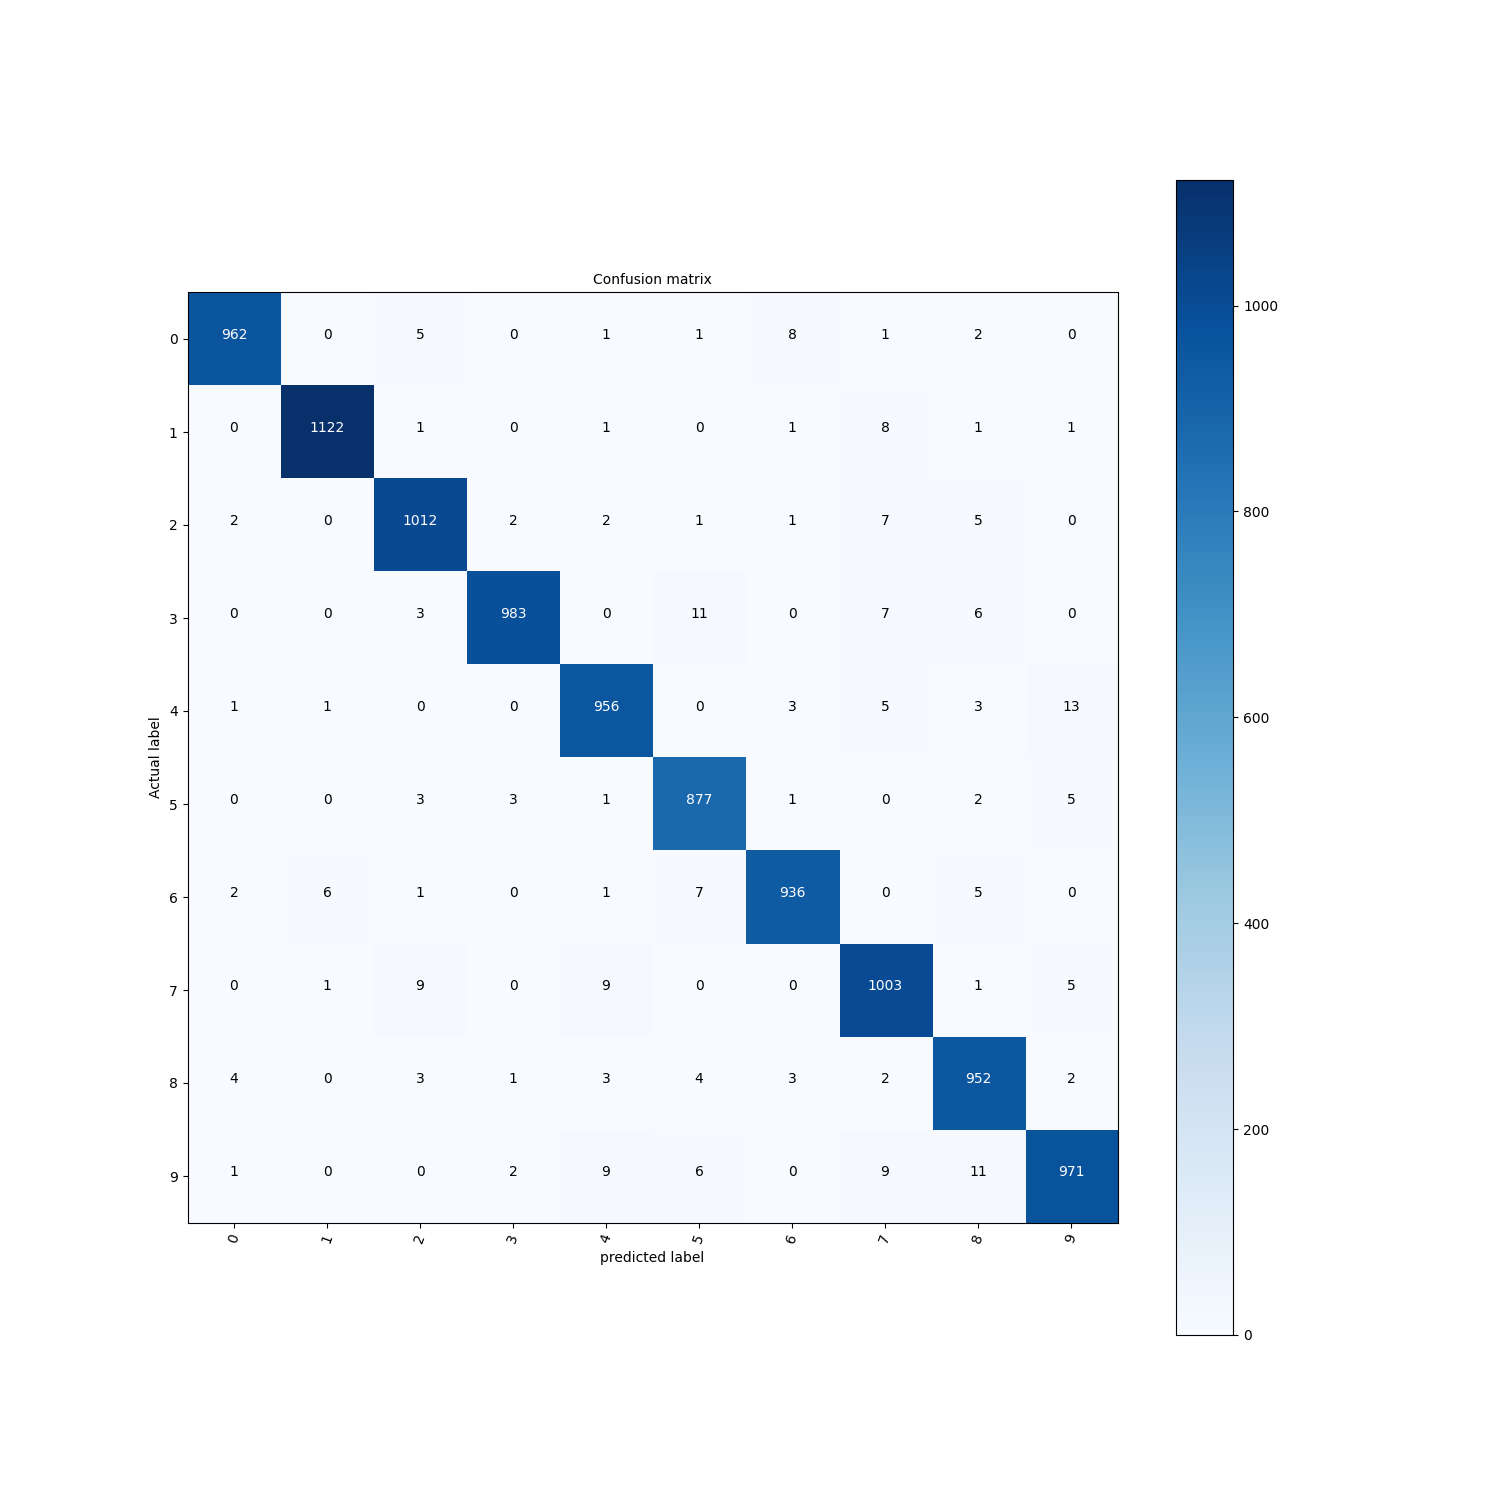

In [36]:
soml.evaluate.plot.confusion_matrix(y_true=y_test, y_prob=y_prob, class_names=class_names)

## Add BatchNormalization and check the results

In [24]:
tf.random.set_seed(42)

model_3 = Sequential([
    Conv2D(filters=48, kernel_size=(2, 2), padding="same", input_shape=(28, 28, 1)),
    BatchNormalization(),
    Activation("relu"),
    MaxPool2D(pool_size=2),
    Dropout(rate=0.2),
    Conv2D(filters=48, kernel_size=2, strides=2, padding="same"),
    BatchNormalization(),
    Activation("relu"),
    MaxPool2D(pool_size=2),
    Dropout(0.2),
    Conv2D(filters=48, kernel_size=2, strides=2, padding="same"),
    BatchNormalization(),
    Activation("relu"),
    MaxPool2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model_3.compile(loss=categorical_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 48)        240       
                                                                 
 batch_normalization_18 (Bat  (None, 28, 28, 48)       192       
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 28, 28, 48)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 48)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 48)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 48)         

In [25]:
model_3.summary()
history_3 = model_3.fit(
    train_data,
    epochs=50,
    batch_size=32,
    steps_per_epoch=len(train_data),
    validation_data=(X_test, y_test),
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 48)        240       
                                                                 
 batch_normalization_18 (Bat  (None, 28, 28, 48)       192       
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 28, 28, 48)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 48)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 48)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 48)         

### Evaluate model 3

In [26]:
results = model_3.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 3s 8ms/step - loss: 0.0724 - accuracy: 0.9755
test loss, test acc: [0.07238630950450897, 0.9755000472068787]


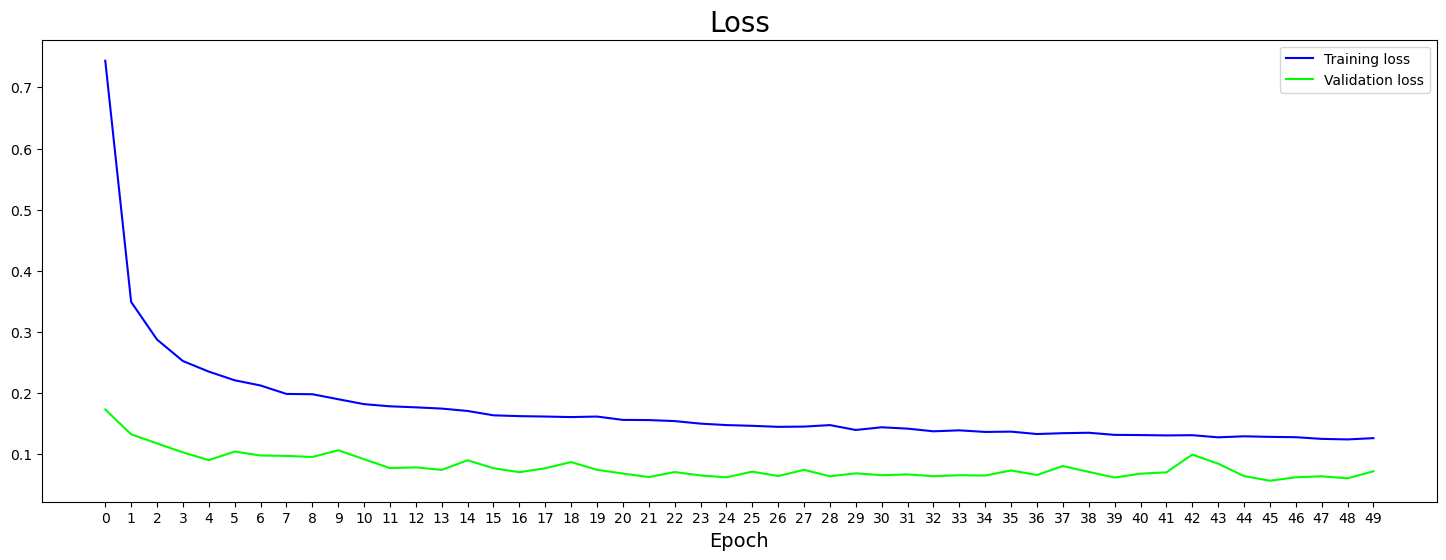

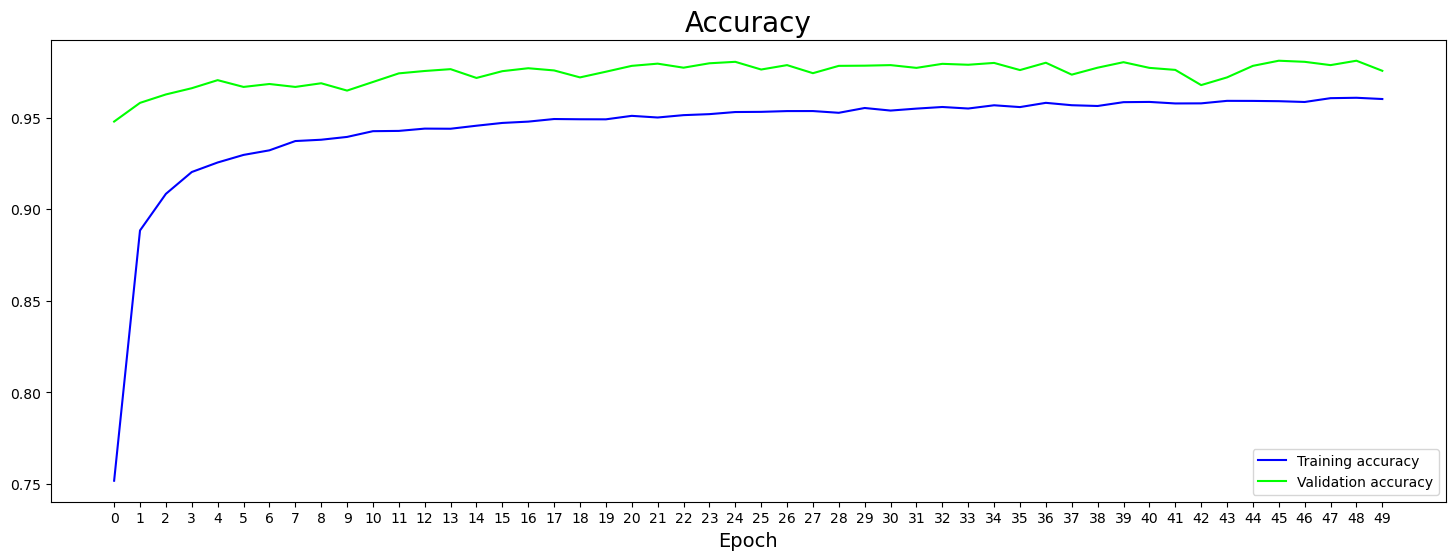

In [27]:
mlp.plot_history(history=history_3, figsize=(18, 6))